In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-26 13:26:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.4’

housing.csv.4       100%[===================>]   1,36M  5,19MB/s    in 0,3s    

2022-09-26 13:26:12 (5,19 MB/s) - ‘housing.csv.4’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data preperation:

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'] = df.total_bedrooms.fillna(0)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [11]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


Code for Question 1:

In [12]:
df.ocean_proximity.value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [13]:
df.ocean_proximity.mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

Code for Question 2:

In [14]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


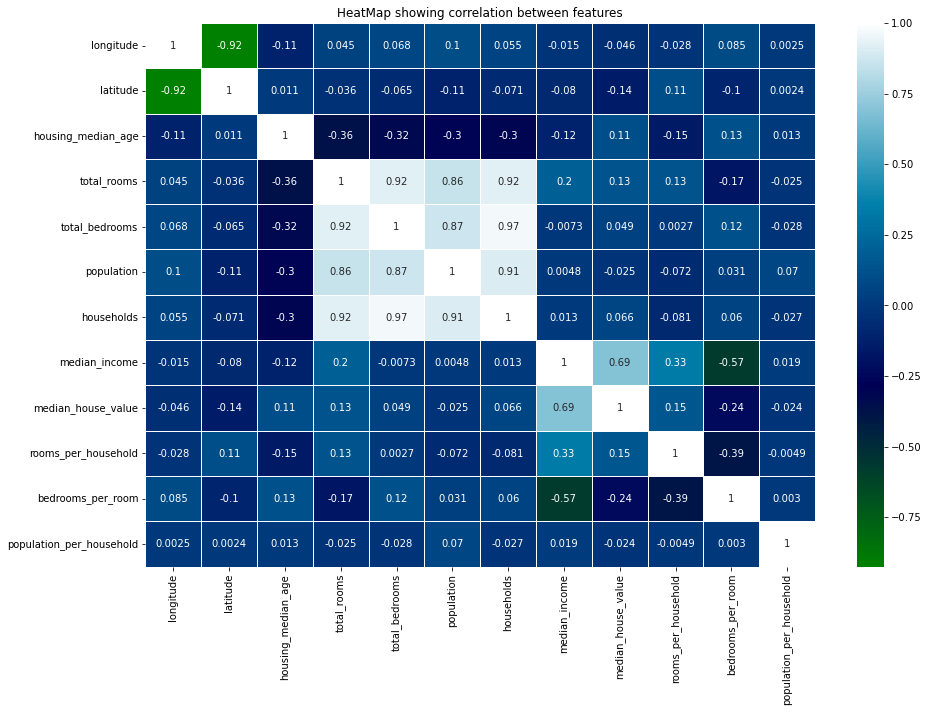

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=.9,cmap="ocean")
plt.title("HeatMap showing correlation between features")
plt.show()

Make median_house_value binary and Splitting the Data

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3

In [19]:
y_train.mean()
above_average_train = np.where(y_train>y_train.mean(),1,0)
above_average_val = np.where(y_val>y_val.mean(),1,0)

In [20]:
def MIScore(series):
    return mutual_info_score(series,above_average_train)

In [21]:
y_train.mean()

206807.7419250646

In [24]:
round(mutual_info_score(df_train.ocean_proximity,above_average_train),2)

0.1

Question 4:

In [26]:
df_train.ocean_proximity.unique()

array(['<1h_ocean', 'near_ocean', 'inland', 'near_bay', 'island'],
      dtype=object)

In [27]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
print(X_train.shape)

(12384, 16)


In [28]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)
print(X_val.shape)

(4128, 16)


In [30]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [31]:
model.fit(X_train,above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
y_preds = model.predict_proba(X_val)[:,1]

In [35]:
decision = (y_preds >= 0.5)

In [37]:
(above_average_val == decision.astype(int)).mean().round(2)

0.84

Question 5:

In [39]:
f_values = dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

In [40]:
dict(sorted(f_values.items(), key=lambda item: item[1]))

{'ocean_proximity=inland': -1.705,
 'rooms_per_household': -0.02,
 'population': -0.002,
 'total_rooms': -0.0,
 'total_bedrooms': 0.002,
 'households': 0.004,
 'population_per_household': 0.011,
 'ocean_proximity=island': 0.019,
 'housing_median_age': 0.036,
 'longitude': 0.084,
 'latitude': 0.106,
 'bedrooms_per_room': 0.188,
 'ocean_proximity=near_bay': 0.285,
 'ocean_proximity=<1h_ocean': 0.473,
 'ocean_proximity=near_ocean': 0.842,
 'median_income': 1.214}

Which of following feature has the smallest difference?
total_rooms   : -0,0
total_bedrooms:  0,002
population    : -0,002
households    :  0,004
so the answer is: population

Question 5:

In [41]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [43]:
for a in [0, 0.01, 0.1, 1, 10]:
    model=Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,np.log1p(y_train))
    preds = model.predict(X_val)
    score = rmse(y_val,preds)
    print("alpha :",a,",score:",score.round(3))

alpha : 0 ,score: 239035.852
alpha : 0.01 ,score: 239035.852
alpha : 0.1 ,score: 239035.852
alpha : 1 ,score: 239035.852
alpha : 10 ,score: 239035.852
